# Graph V
![image.png](../images/image5.png)

In [2]:
from typing import TypedDict, Dict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image
import random

In [3]:
class AgentState(TypedDict):
    name: str
    greeting: str
    number: List[int]
    counter: int
    stopping_number: int

In [4]:
# Node Definitions
def greeting_node(state: AgentState) -> AgentState:
    """Node that greets the agent."""

    # Initialize counter variable
    state["counter"] = 0

    # Create greeting message
    state["greeting"] = f"Hello, {state['name']}! Let's start the counting exercise."

    # Return updated state
    return state


def random_number_node(state: AgentState) -> AgentState:
    """Node that generates a random number from 0 to 100 and appends it to the list."""

    # Generate random number and append to list
    random_number = random.randint(0, 100)
    state["number"].append(random_number)

    # Increment counter
    state["counter"] += 1

    # Return updated state
    return state

# Condition Definition for stopping the loop i.e. to decide whether to continue loop or end it
# def should_continue(state: AgentState) -> bool:
#     """Condition to check if the agent should continue generating numbers."""
#     return state["counter"] < 5

# the other way to define the condition is as below
def should_continue(state: AgentState) -> AgentState:
    """Condition to check if the agent should continue generating numbers."""
    if state["counter"] < state["stopping_number"]:
        print(f"Current count is {state['counter']}. Continuing to generate numbers.")
        return "loop"   # continue the loop
    else:
        return "exit"   # end the loop

# trajectory the graph will follow
# START -> greeting_node -> random_number_node -> should_continue -> (loop back to random_number_node or exit to END)

In [5]:
graph = StateGraph(AgentState)

# Adding nodes to the graph
graph.add_node("greeting_node", greeting_node)
graph.add_node("random_number_node", random_number_node)

# Add edges
graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "random_number_node")

graph.add_conditional_edges(
    "random_number_node",   # source
    should_continue,    # action
    {
    "loop": "random_number_node",   # Self-loop to random_number_node
    "exit": END     # Exit to END
}
)

app = graph.compile()

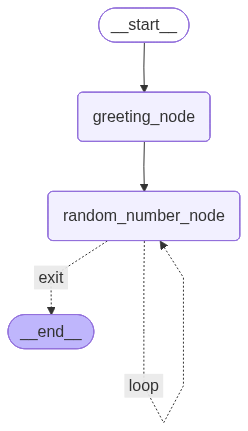

In [6]:
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
initial_state: AgentState = {
    "name": "Alice",
    # "greeting": "",
    "number": [],
    # "counter": 0,
    "stopping_number": 3  # Set the stopping number to 3 for this
}

print("Initial State:", initial_state)
final_state = app.invoke(initial_state)
print("Final State:", final_state)

Initial State: {'name': 'Alice', 'number': [], 'stopping_number': 3}
Current count is 1. Continuing to generate numbers.
Current count is 2. Continuing to generate numbers.
Final State: {'name': 'Alice', 'greeting': "Hello, Alice! Let's start the counting exercise.", 'number': [8, 42, 79], 'counter': 3, 'stopping_number': 3}
